<a href="https://colab.research.google.com/github/MAboElFottouh/ML_predict-_drugs-/blob/main/predict__drugs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [67]:
data = pd.read_csv("/content/drive/MyDrive/drug200.csv")


In [68]:
print('\nNumber of rows and columns in the data set: ',data.shape)
#Lets look into top few rows and columns in the dataset
data.head()


Number of rows and columns in the data set:  (200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [69]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [70]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [71]:
data.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [72]:
data['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

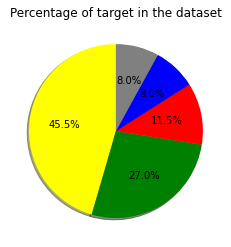

In [73]:
from matplotlib import pyplot as plt
sizes = data['Drug'].value_counts(sort = True)
colors = ["yellow","green",'red','blue','grey'] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [74]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [75]:
data['Drug']=le.fit_transform(data['Drug'])


In [76]:
print(data['Sex'].nunique())
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data["Sex"].values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["Sex"+str(int(i)) for i in range(data['Sex'].nunique())]) 
data = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
data= data.drop(['Sex'], axis=1) 
data= data.drop("Sex"+str(0), axis=1) 
#printing to verify 
print(data.head())

2
   Age      BP Cholesterol  Na_to_K  Drug  Sex1
0   23    HIGH        HIGH   25.355     0   0.0
1   47     LOW        HIGH   13.093     3   1.0
2   47     LOW        HIGH   10.114     3   1.0
3   28  NORMAL        HIGH    7.798     4   0.0
4   61     LOW        HIGH   18.043     0   0.0


In [77]:
print(data['BP'].nunique())
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data["BP"].values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["BP"+str(int(i)) for i in range(data['BP'].nunique())]) 
data = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
data= data.drop(['BP'], axis=1) 
data= data.drop("BP"+str(0), axis=1) 
#printing to verify 
print(data.head())

3
   Age Cholesterol  Na_to_K  Drug  Sex1  BP1  BP2
0   23        HIGH   25.355     0   0.0  0.0  0.0
1   47        HIGH   13.093     3   1.0  1.0  0.0
2   47        HIGH   10.114     3   1.0  1.0  0.0
3   28        HIGH    7.798     4   0.0  0.0  1.0
4   61        HIGH   18.043     0   0.0  1.0  0.0


In [78]:
print(data['Cholesterol'].nunique())
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data["Cholesterol"].values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["Cholesterol"+str(int(i)) for i in range(data['Cholesterol'].nunique())]) 
data = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
data= data.drop(['Cholesterol'], axis=1) 
data= data.drop("Cholesterol"+str(0), axis=1) 
#printing to verify 
print(data.head())

2
   Age  Na_to_K  Drug  Sex1  BP1  BP2  Cholesterol1
0   23   25.355     0   0.0  0.0  0.0           0.0
1   47   13.093     3   1.0  1.0  0.0           0.0
2   47   10.114     3   1.0  1.0  0.0           0.0
3   28    7.798     4   0.0  0.0  1.0           0.0
4   61   18.043     0   0.0  1.0  0.0           0.0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           200 non-null    int64  
 1   Na_to_K       200 non-null    float64
 2   Drug          200 non-null    int64  
 3   Sex1          200 non-null    float64
 4   BP1           200 non-null    float64
 5   BP2           200 non-null    float64
 6   Cholesterol1  200 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.1 KB


In [80]:
data['Drug1']=data['Drug']
data= data.drop(['Drug'], axis=1) 

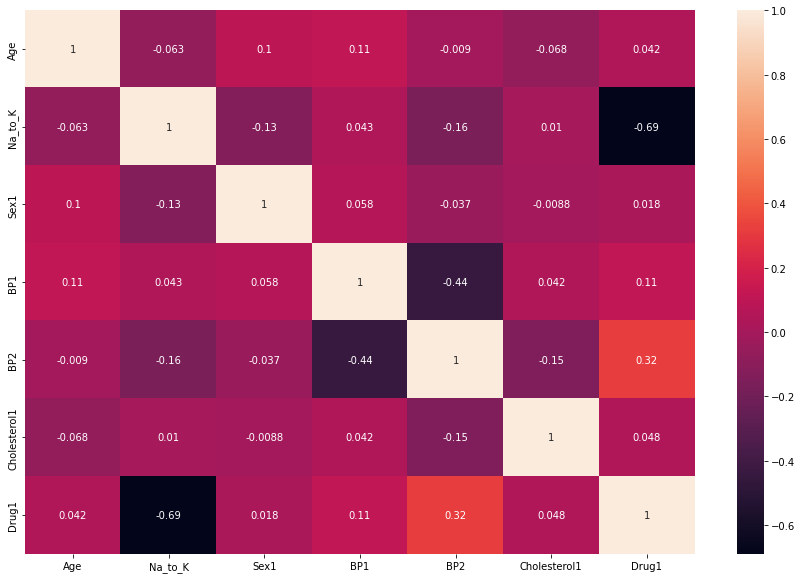

In [81]:
co=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=co,annot=True)

In [82]:
from sklearn.model_selection import train_test_split

X = data.drop('Drug1', axis=1)
y = data['Drug1']
train_X,test_X,train_y,test_y = train_test_split(X,y)


#for multi-class classification include:

k-Nearest Neighbors.
Decision Trees.

Naive Bayes.

Random Forest.

Gradient Boosting.

In [83]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
                           
DT.fit(train_X,train_y)

DecisionTreeClassifier()

In [84]:
#On train Set 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
y_pred=DT.predict(train_X)
print("Accuracy :" ,accuracy_score(train_y,y_pred))
#On test Set 
y_pred=DT.predict(test_X)
print("Accuracy :" ,accuracy_score(test_y,y_pred))

Accuracy : 1.0
Accuracy : 1.0


In [85]:
from collections import Counter 
from imblearn.over_sampling import SMOTE
print("Before OverSampling count of labels : {} ".format(Counter(data.Drug1.values)))
smote=SMOTE()

X_ov,y_ov=smote.fit_resample(X,y)
print("After OverSampling count of labels : {} ".format(Counter(y_ov)))

Before OverSampling count of labels : Counter({0: 91, 4: 54, 1: 23, 3: 16, 2: 16}) 
After OverSampling count of labels : Counter({0: 91, 3: 91, 4: 91, 1: 91, 2: 91}) 


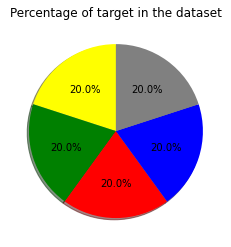

In [91]:
from matplotlib import pyplot as plt
sizes = y_ov.value_counts(sort = True)
colors = ["yellow","green",'red','blue','grey'] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [86]:
data

,Age,Na_to_K,Sex1,BP1,BP2,Cholesterol1,Drug1
0,23,25.355,0.0,0.0,0.0,0.0,0
1,47,13.093,1.0,1.0,0.0,0.0,3
2,47,10.114,1.0,1.0,0.0,0.0,3
3,28,7.798,0.0,0.0,1.0,0.0,4
4,61,18.043,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...
195,56,11.567,0.0,1.0,0.0,0.0,3
196,16,12.006,1.0,1.0,0.0,0.0,3
197,52,9.894,1.0,0.0,1.0,0.0,4
198,23,14.020,1.0,0.0,1.0,1.0,4


In [87]:
from sklearn.model_selection import train_test_split

X = X_ov
y = y_ov
train_X,test_X,train_y,test_y = train_test_split(X,y)

In [88]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
                           
DT.fit(train_X,train_y)
#On train Set 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
y_pred=DT.predict(train_X)
print("Accuracy :" ,accuracy_score(train_y,y_pred))
#On test Set 
y_pred=DT.predict(test_X)
print("Accuracy :" ,accuracy_score(test_y,y_pred))

Accuracy : 1.0
Accuracy : 1.0


In [89]:
from sklearn import tree
text_representation = tree.export_text(DT)
print(text_representation)

|--- feature_1 <= 14.83
|   |--- feature_3 <= 0.99
|   |   |--- feature_4 <= 0.01
|   |   |   |--- feature_0 <= 50.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  50.50
|   |   |   |   |--- class: 2
|   |   |--- feature_4 >  0.01
|   |   |   |--- class: 4
|   |--- feature_3 >  0.99
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 3
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: 4
|--- feature_1 >  14.83
|   |--- class: 0



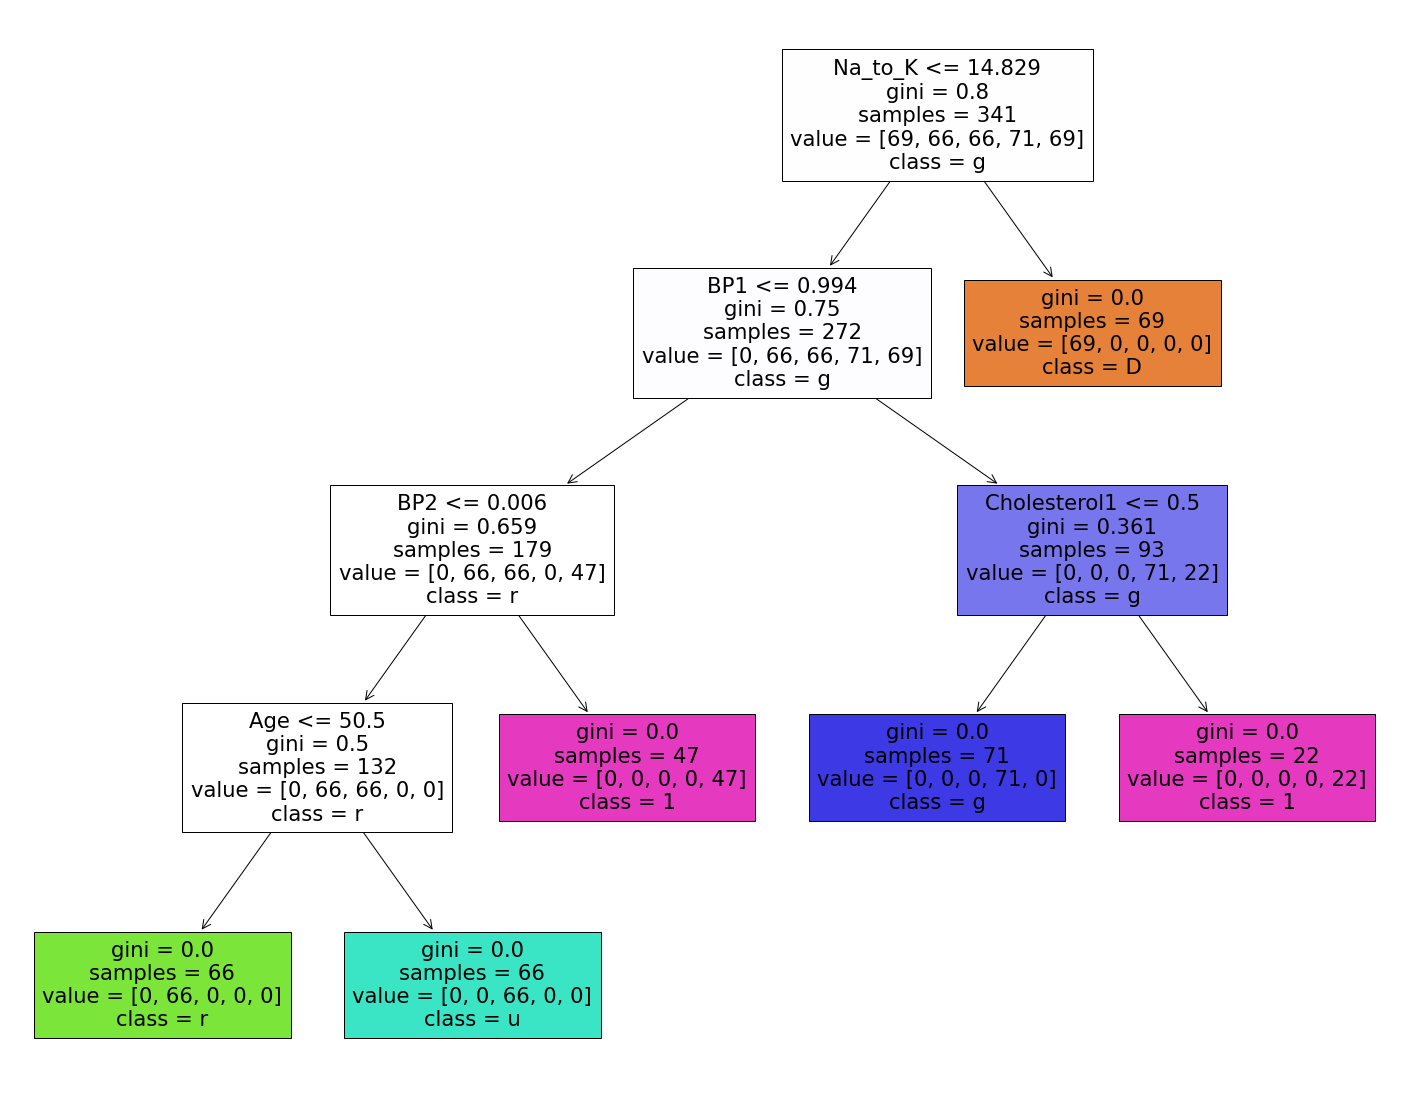

In [90]:
x=data.columns
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT, 
                   feature_names=x[:-1],  
                   class_names=x[-1],
                   filled=True)